In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path
from typing import List, Tuple, Dict
import seaborn as sns
from tqdm.auto import trange, tqdm

from taskpriors.core import compute_expectation_variance

/home/user/taskpriors/taskpriors/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Data from MIEB

/tmp/ipykernel_1673/4291654607.py:122: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(model, (vars[i], means[i]), fontsize=8, alpha=0.7)


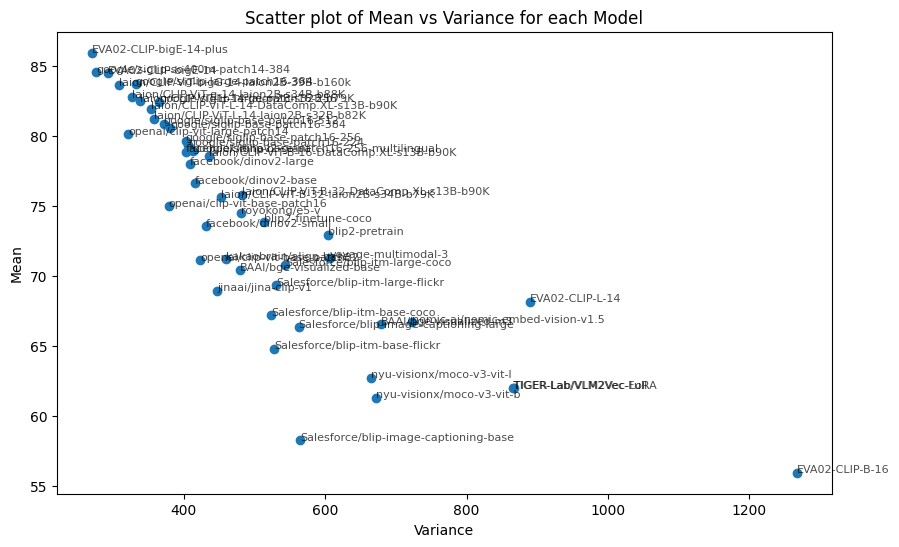

In [2]:
# Import Data from MIEB Paper
datasets = ['CIFAR10', 'DTD', 'EuroSAT', 'FER2013', 'GTSRB', 'MNIST', 'PatchCamelyon', 'STL10', 'VOC2007', 'Birdsnap', 'Caltech101', 'CIFAR100', 'Country211', 'FGVCAircraft', 'Food101', 'Imagenet1k', 'OxfordFlowers', 'OxfordPets', 'RESISC45', 'StanfordCars', 'SUN397', 'UCF101']
data = {
    'EVA02-CLIP-bigE-14-plus': [99.50, 81.14, 93.86, 50.84, 88.99, 92.79, 76.48, 99.76, 91.68, 80.77, 97.40, 94.15, 31.64, 78.19, 94.93, 82.40, 99.55, 94.99, 92.77, 95.41, 80.52, 93.25],
    'google/siglip-so400m-patch14-384': [96.92, 80.81, 88.97, 47.41, 86.39, 96.11, 75.41, 99.51, 92.40, 72.91, 97.03, 84.59, 32.47, 78.49, 95.47, 82.16, 99.53, 94.85, 91.64, 95.75, 80.16, 91.65],
    'google/siglip-large-patch16-384': [96.74, 80.47, 89.62, 46.20, 85.76, 96.21, 77.31, 99.33, 92.23, 72.02, 96.83, 83.49, 23.00, 75.44, 95.00, 81.20, 99.57, 95.09, 90.94, 95.51, 79.03, 90.45],
    'laion/CLIP-ViT-bigG-14-laion2B-39B-b160k': [98.42, 79.50, 92.22, 47.30, 87.69, 96.12, 71.25, 99.53, 91.81, 74.19, 96.53, 88.03, 28.57, 70.02, 92.52, 78.23, 99.33, 93.49, 90.94, 95.19, 78.35, 90.84],
    'laion/CLIP-ViT-g-14-laion2B-s34B-b88K': [97.88, 78.87, 91.84, 45.64, 85.48, 96.53, 74.08, 99.39, 91.99, 71.86, 95.36, 86.62, 26.10, 65.99, 91.13, 77.32, 99.18, 92.71, 90.74, 94.95, 78.19, 89.10],
    'EVA02-CLIP-bigE-14': [99.47, 79.74, 93.36, 49.19, 85.84, 92.60, 72.82, 99.73, 85.98, 78.22, 96.40, 93.76, 28.84, 74.37, 94.70, 81.47, 99.47, 94.31, 91.96, 95.02, 79.93, 92.12],
    'google/siglip-large-patch16-256': [96.72, 80.00, 89.28, 45.45, 84.24, 96.05, 75.48, 99.21, 92.12, 65.89, 96.77, 83.48, 19.40, 71.15, 93.64, 79.34, 99.47, 94.61, 89.93, 95.12, 77.86, 88.87],
    'laion/CLIP-ViT-H-14-laion2B-s32B-b79K': [97.64, 79.26, 92.36, 44.29, 83.89, 96.17, 73.02, 99.39, 92.11, 72.26, 95.75, 86.29, 25.11, 65.09, 91.04, 76.54, 98.98, 91.86, 90.88, 94.68, 78.11, 89.76],
    'laion/CLIP-ViT-L-14-laion2B-s32B-b82K': [97.15, 78.61, 91.26, 44.71, 84.19, 95.03, 72.32, 99.18, 91.94, 68.42, 93.79, 84.73, 22.02, 60.45, 89.61, 74.67, 98.82, 91.70, 90.14, 93.90, 77.06, 87.49],
    'royokong/e5-v': [94.14, 72.24, 87.51, 53.96, 80.02, 91.60, 72.39, 98.81, 96.11, 44.62, 91.83, 71.90, 10.64, 37.74, 85.31, 66.57, 94.16, 79.91, 89.10, 61.55, 72.64, 86.07],
    'laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K': [98.55, 78.50, 77.57, 41.32, 88.12, 96.16, 73.53, 99.44, 91.68, 72.60, 96.44, 88.85, 24.59, 64.15, 92.73, 77.29, 99.10, 92.42, 90.44, 93.89, 77.18, 88.64],
    'google/siglip-base-patch16-512': [92.66, 79.48, 86.40, 42.92, 80.76, 95.48, 73.52, 98.72, 92.63, 67.46, 96.93, 74.47, 18.05, 70.08, 92.67, 77.54, 99.10, 92.92, 88.36, 94.57, 77.16, 87.73],
    'google/siglip-base-patch16-256': [93.34, 78.64, 87.61, 42.46, 79.87, 95.71, 73.10, 98.35, 92.29, 60.18, 96.82, 75.67, 14.98, 66.13, 90.25, 74.73, 99.00, 91.68, 87.52, 93.72, 75.66, 85.24],
    'google/siglip-base-patch16-384': [92.91, 79.05, 86.99, 42.08, 80.15, 95.35, 73.57, 98.63, 92.54, 66.16, 97.11, 74.81, 17.38, 69.00, 92.13, 76.77, 99.02, 92.71, 88.44, 94.45, 76.93, 86.96],
    'google/siglip-base-patch16-256-multilingual': [92.89, 77.94, 87.44, 42.73, 80.31, 94.98, 73.91, 98.24, 91.88, 57.22, 96.98, 74.68, 15.11, 59.93, 89.97, 73.95, 99.33, 91.98, 85.60, 92.96, 74.62, 83.83],
    'google/siglip-base-patch16-224': [92.60, 77.94, 87.75, 42.19, 80.07, 95.42, 73.07, 98.33, 92.02, 58.91, 96.79, 74.10, 14.58, 66.07, 89.88, 74.19, 98.57, 91.44, 87.65, 93.70, 75.27, 84.80],
    'openai/clip-vit-large-patch14': [96.15, 72.78, 80.54, 47.11, 83.59, 93.70, 74.74, 99.39, 90.93, 67.59, 94.32, 79.99, 26.97, 56.19, 91.99, 75.10, 98.92, 91.94, 89.64, 87.43, 76.08, 87.78],
    'blip2-finetune-coco': [97.70, 72.60, 76.89, 50.45, 79.87, 93.44, 71.68, 99.38, 94.41, 41.23, 90.25, 82.26, 8.72, 35.21, 84.13, 65.51, 94.06, 66.92, 87.60, 73.49, 72.34, 87.55],
    'laion/CLIP-ViT-B-16-DataComp.XL-s13B-b90K': [96.84, 76.26, 88.84, 35.28, 83.10, 95.14, 70.21, 98.57, 90.74, 62.55, 95.36, 83.40, 16.98, 53.93, 88.07, 70.75, 98.92, 88.79, 87.64, 91.22, 73.72, 82.81],
    'laion/CLIP-ViT-B-32-laion2B-s34B-b79K': [94.05, 74.00, 88.93, 40.98, 78.19, 95.00, 69.68, 97.77, 90.28, 50.76, 94.89, 77.17, 13.41, 47.12, 78.78, 64.13, 96.84, 85.05, 85.85, 88.49, 71.65, 81.08],
    'blip2-pretrain': [98.62, 74.29, 78.77, 52.37, 68.19, 92.86, 73.17, 98.60, 90.62, 30.33, 91.82, 87.51, 10.75, 34.27, 88.24, 58.72, 96.61, 43.79, 88.59, 82.81, 75.64, 88.33],
    'laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K': [95.86, 74.19, 89.07, 32.75, 81.41, 95.55, 69.92, 97.67, 89.63, 52.13, 94.77, 80.84, 13.17, 49.27, 81.51, 64.94, 97.75, 84.97, 84.85, 88.12, 70.51, 78.90],
    'voyage-multimodal-3': [95.54, 72.56, 79.27, 46.69, 75.52, 94.48, 67.79, 98.78, 78.51, 32.69, 91.39, 78.13, 8.90, 22.52, 87.38, 58.51, 92.65, 86.56, 87.34, 52.91, 76.31, 84.33],
    'openai/clip-vit-base-patch16': [91.60, 69.51, 74.21, 45.63, 72.69, 91.14, 70.60, 98.65, 90.46, 57.29, 93.47, 71.24, 18.69, 46.01, 86.46, 67.53, 97.27, 86.02, 86.51, 80.58, 72.13, 81.94],
    'facebook/dinov2-giant': [98.53, 76.09, 84.53, 41.06, 55.14, 85.82, 74.17, 97.84, 85.44, 81.88, 89.14, 89.63, 13.53, 70.37, 88.10, 78.70, 99.71, 94.93, 86.30, 83.18, 72.31, 89.19],
    'facebook/dinov2-base': [96.45, 75.93, 81.66, 39.94, 53.48, 86.71, 72.73, 97.72, 85.94, 77.24, 89.45, 84.49, 10.73, 62.74, 84.44, 75.92, 99.57, 94.12, 81.30, 78.53, 71.03, 85.51],
    'facebook/dinov2-large': [97.95, 76.45, 80.23, 41.40, 53.22, 82.40, 74.37, 97.93, 85.51, 81.05, 89.58, 88.83, 12.73, 65.14, 87.79, 78.62, 99.61, 94.90, 86.21, 81.00, 72.76, 88.08],
    'openai/clip-vit-base-patch32': [89.85, 66.61, 67.23, 42.88, 70.12, 89.47, 70.96, 97.73, 90.07, 47.09, 91.51, 67.41, 14.73, 38.13, 79.45, 61.16, 94.82, 80.51, 82.82, 73.78, 69.53, 78.78],
    'facebook/dinov2-small': [92.95, 72.43, 81.86, 37.27, 52.22, 86.58, 74.55, 97.36, 86.94, 71.37, 88.58, 77.02, 8.10, 58.67, 77.68, 69.40, 99.51, 92.01, 76.86, 69.89, 66.65, 80.53],
    'Salesforce/blip-itm-large-coco': [95.74, 70.59, 80.90, 48.09, 64.53, 83.92, 67.69, 98.85, 69.32, 34.67, 89.12, 76.45, 9.08, 22.37, 81.76, 67.91, 96.49, 81.62, 85.68, 74.80, 72.89, 84.50],
    'TIGER-Lab/VLM2Vec-Full': [87.93, 68.51, 75.80, 51.41, 65.06, 86.75, 68.21, 97.60, 71.00, 0.22, 92.22, 60.19, 8.35, 22.02, 74.71, 0.10, 84.20, 81.79, 79.43, 40.22, 71.04, 76.50],
    'TIGER-Lab/VLM2Vec-LoRA': [87.94, 68.48, 75.74, 51.37, 65.09, 86.71, 68.16, 97.60, 70.97, 0.22, 92.40, 60.20, 8.35, 22.06, 74.68, 0.10, 84.29, 81.80, 79.41, 40.14, 71.06, 76.52],
    'BAAI/bge-visualized-base': [97.75, 68.26, 83.34, 44.65, 52.04, 81.55, 65.19, 99.19, 68.89, 45.16, 90.59, 82.96, 10.12, 35.91, 84.12, 64.86, 95.25, 78.21, 83.09, 66.29, 73.62, 77.76],
    'Salesforce/blip-itm-base-coco': [87.66, 69.79, 80.86, 43.86, 62.95, 85.72, 64.62, 97.87, 66.72, 26.99, 88.63, 59.69, 8.74, 24.01, 76.31, 60.60, 87.55, 76.07, 81.93, 74.86, 71.10, 81.81],
    'kakaobrain/align-base': [81.23, 74.04, 65.29, 35.89, 59.44, 86.78, 68.30, 95.95, 91.81, 46.25, 96.93, 58.83, 15.16, 40.19, 82.74, 67.18, 96.24, 80.71, 83.82, 85.22, 74.09, 80.12],
    'Salesforce/blip-itm-large-flickr': [94.34, 69.16, 79.05, 45.43, 58.18, 83.56, 66.09, 98.37, 64.03, 36.33, 87.89, 73.50, 10.12, 21.78, 81.95, 66.97, 96.24, 81.78, 83.05, 74.57, 71.42, 82.23],
    'jinaai/jina-clip-v1': [90.62, 68.06, 83.27, 44.50, 57.54, 84.04, 62.97, 97.06, 66.89, 46.36, 88.22, 70.19, 9.59, 32.35, 79.50, 60.57, 93.06, 80.17, 84.01, 71.69, 69.62, 76.69],
    'nyu-visionx/moco-v3-vit-l': [90.13, 67.04, 89.50, 34.78, 49.80, 78.94, 73.08, 95.39, 72.80, 28.65, 86.62, 69.95, 7.03, 18.62, 54.39, 64.27, 89.92, 84.85, 73.76, 22.34, 57.15, 70.97],
    'BAAI/bge-visualized-m3': [96.27, 62.98, 77.77, 44.63, 50.14, 80.83, 68.29, 98.84, 67.35, 40.25, 88.35, 78.14, 10.37, 38.87, 80.37, 0.10, 94.41, 73.99, 80.95, 81.34, 73.41, 76.23],
    'EVA02-CLIP-L-14': [98.99, 65.09, 83.89, 44.24, 59.34, 74.80, 69.04, 99.39, 51.74, 0.22, 89.87, 87.17, 18.12, 54.65, 90.21, 0.10, 98.02, 90.25, 84.52, 89.30, 68.46, 81.93],
    'nyu-visionx/moco-v3-vit-b': [89.36, 65.95, 88.65, 32.70, 45.93, 76.74, 72.99, 95.14, 71.02, 26.87, 85.44, 70.18, 6.56, 18.90, 50.54, 62.39, 88.80, 82.65, 72.55, 20.23, 55.18, 70.11],
    'Salesforce/blip-itm-base-flickr': [83.85, 66.71, 78.81, 41.93, 56.24, 83.78, 63.98, 96.89, 60.62, 25.92, 87.43, 55.88, 8.13, 20.10, 74.50, 59.25, 85.88, 76.89, 78.51, 72.76, 67.47, 80.14],
    'Salesforce/blip-image-captioning-large': [94.58, 66.27, 60.57, 43.60, 59.85, 80.69, 66.72, 98.23, 45.21, 31.82, 87.77, 72.95, 8.44, 20.62, 78.36, 64.42, 94.20, 80.46, 82.01, 72.30, 70.18, 80.57],
    'EVA02-CLIP-B-16': [98.12, 61.34, 77.12, 43.70, 38.39, 76.46, 65.57, 99.00, 45.06, 0.22, 88.76, 82.82, 0.47, 39.64, 80.76, 0.10, 95.67, 87.52, 76.19, 0.55, 0.46, 72.88],
    'nomic-ai/nomic-embed-vision-v1.5': [97.25, 64.16, 49.01, 32.04, 49.03, 76.17, 65.69, 98.59, 60.33, 52.16, 87.50, 84.12, 11.73, 54.01, 86.86, 0.10, 98.88, 91.88, 77.94, 87.91, 68.93, 73.47],
    'Salesforce/blip-image-captioning-base': [81.37, 64.47, 53.31, 41.23, 34.90, 85.13, 63.43, 94.20, 34.29, 20.63, 86.20, 52.57, 9.53, 17.31, 68.59, 50.03, 85.35, 59.01, 75.11, 67.39, 64.54, 72.88],
}
block1_cols = ['CIFAR10','DTD','EuroSAT','FER2013','GTSRB','MNIST','PatchCamelyon','STL10','VOC2007']

block1_update = {
    'EVA02-CLIP-bigE-14-plus': [99.50, 81.14, 93.86, 50.84, 88.99, 92.79, 76.48, 99.76, 91.68],
    'google/siglip-so400m-patch14-384': [96.92, 80.81, 88.97, 47.41, 86.39, 96.11, 75.41, 99.51, 92.40],
    'google/siglip-large-patch16-384': [96.74, 80.47, 89.62, 46.20, 85.76, 96.21, 77.31, 99.33, 92.23],
    'laion/CLIP-ViT-bigG-14-laion2B-39B-b160k': [98.42, 79.50, 92.22, 47.30, 87.69, 96.12, 71.25, 99.53, 91.81],
    'laion/CLIP-ViT-g-14-laion2B-s34B-b88K': [97.88, 78.87, 91.84, 45.64, 85.48, 96.53, 74.08, 99.39, 91.99],
    'EVA02-CLIP-bigE-14': [99.47, 79.74, 93.36, 49.19, 85.84, 92.60, 72.82, 99.73, 85.98],
    'google/siglip-large-patch16-256': [96.72, 80.00, 89.28, 45.45, 84.24, 96.05, 75.48, 99.21, 92.12],
    'laion/CLIP-ViT-H-14-laion2B-s32B-b79K': [97.64, 79.26, 92.36, 44.29, 83.89, 96.17, 73.02, 99.39, 92.11],
    'laion/CLIP-ViT-L-14-laion2B-s32B-b82K': [97.15, 78.61, 91.26, 44.71, 84.19, 95.03, 72.32, 99.18, 91.94],
    'royokong/e5-v': [94.14, 72.24, 87.51, 53.96, 80.02, 91.60, 72.39, 98.81, 96.11],
    'laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K': [98.55, 78.50, 77.57, 41.32, 88.12, 96.16, 73.53, 99.44, 91.68],
    'google/siglip-base-patch16-512': [92.66, 79.48, 86.40, 42.92, 80.76, 95.48, 73.52, 98.72, 92.63],
    'google/siglip-base-patch16-256': [93.34, 78.64, 87.61, 42.46, 79.87, 95.71, 73.10, 98.35, 92.29],
    'google/siglip-base-patch16-384': [92.91, 79.05, 86.99, 42.08, 80.15, 95.35, 73.57, 98.63, 92.54],
    'google/siglip-base-patch16-256-multilingual': [92.89, 77.94, 87.44, 42.73, 80.31, 94.98, 73.91, 98.24, 91.88],
    'google/siglip-base-patch16-224': [92.60, 77.94, 87.75, 42.19, 80.07, 95.42, 73.07, 98.33, 92.02],
    'openai/clip-vit-large-patch14': [96.15, 72.78, 80.54, 47.11, 83.59, 93.70, 74.74, 99.39, 90.93],
    'blip2-finetune-coco': [97.70, 72.60, 76.89, 50.45, 79.87, 93.44, 71.68, 99.38, 94.41],
    'laion/CLIP-ViT-B-16-DataComp.XL-s13B-b90K': [96.84, 76.26, 88.84, 35.28, 83.10, 95.14, 70.21, 98.57, 90.74],
    'laion/CLIP-ViT-B-32-laion2B-s34B-b79K': [94.05, 74.00, 88.93, 40.98, 78.19, 95.00, 69.68, 97.77, 90.28],
    'blip2-pretrain': [98.62, 74.29, 78.77, 52.37, 68.19, 92.86, 73.17, 98.60, 90.62],
    'laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K': [95.86, 74.19, 89.07, 32.75, 81.41, 95.55, 69.92, 97.67, 89.63],
    'voyage-multimodal-3': [95.54, 72.56, 79.27, 46.69, 75.52, 94.48, 67.79, 98.78, 78.51],
    'openai/clip-vit-base-patch16': [91.60, 69.51, 74.21, 45.63, 72.69, 91.14, 70.60, 98.65, 90.46],
    'facebook/dinov2-giant': [98.53, 76.09, 84.53, 41.06, 55.14, 85.82, 74.17, 97.84, 85.44],
    'facebook/dinov2-base': [96.45, 75.93, 81.66, 39.94, 53.48, 86.71, 72.73, 97.72, 85.94],
    'facebook/dinov2-large': [97.95, 76.45, 80.23, 41.40, 53.22, 82.40, 74.37, 97.93, 85.51],
    'openai/clip-vit-base-patch32': [89.85, 66.61, 67.23, 42.88, 70.12, 89.47, 70.96, 97.73, 90.07],
    'facebook/dinov2-small': [92.95, 72.43, 81.86, 37.27, 52.22, 86.58, 74.55, 97.36, 86.94],
    'Salesforce/blip-itm-large-coco': [95.74, 70.59, 80.90, 48.09, 64.53, 83.92, 67.69, 98.85, 69.32],
    'TIGER-Lab/VLM2Vec-Full': [87.93, 68.51, 75.80, 51.41, 65.06, 86.75, 68.21, 97.60, 71.00],
    'TIGER-Lab/VLM2Vec-LoRA': [87.94, 68.48, 75.74, 51.37, 65.09, 86.71, 68.16, 97.60, 70.97],
    'BAAI/bge-visualized-base': [97.75, 68.26, 83.34, 44.65, 52.04, 81.55, 65.19, 99.19, 68.89],
    'Salesforce/blip-itm-base-coco': [87.66, 69.79, 80.86, 43.86, 62.95, 85.72, 64.62, 97.87, 66.72],
    'kakaobrain/align-base': [81.23, 74.04, 65.29, 35.89, 59.44, 86.78, 68.30, 95.95, 91.81],
    'Salesforce/blip-itm-large-flickr': [94.34, 69.16, 79.05, 45.43, 58.18, 83.56, 66.09, 98.37, 64.03],
    'jinaai/jina-clip-v1': [90.62, 68.06, 83.27, 44.50, 57.54, 84.04, 62.97, 97.06, 66.89],
    'nyu-visionx/moco-v3-vit-l': [90.13, 67.04, 89.50, 34.78, 49.80, 78.94, 73.08, 95.39, 72.80],
    'BAAI/bge-visualized-m3': [96.27, 62.98, 77.77, 44.63, 50.14, 80.83, 68.29, 98.84, 67.35],
    'EVA02-CLIP-L-14': [98.99, 65.09, 83.89, 44.24, 59.34, 74.80, 69.04, 99.39, 51.74],
    'nyu-visionx/moco-v3-vit-b': [89.36, 65.95, 88.65, 32.70, 45.93, 76.74, 72.99, 95.14, 71.02],
    'Salesforce/blip-itm-base-flickr': [83.85, 66.71, 78.81, 41.93, 56.24, 83.78, 63.98, 96.89, 60.62],
    'Salesforce/blip-image-captioning-large': [94.58, 66.27, 60.57, 43.60, 59.85, 80.69, 66.72, 98.23, 45.21],
    'EVA02-CLIP-B-16': [98.12, 61.34, 77.12, 43.70, 38.39, 76.46, 65.57, 99.00, 45.06],
    'nomic-ai/nomic-embed-vision-v1.5': [97.25, 64.16, 49.01, 32.04, 49.03, 76.17, 65.69, 98.59, 60.33],
    'Salesforce/blip-image-captioning-base': [81.37, 64.47, 53.31, 41.23, 34.90, 85.13, 63.43, 94.20, 34.29],
}

# Sanity check and merge into your existing objects:
if datasets[:len(block1_cols)] != block1_cols:
    raise ValueError(f"Expected first columns {block1_cols}, but got {datasets[:len(block1_cols)]}")

for model, vals in block1_update.items():
    if model in data:
        data[model][:len(vals)] = vals                     # update first-block metrics
    else:
        data[model] = vals + [None] * (len(datasets) - 9)  # add new model with placeholders for later columns

df = pd.DataFrame.from_dict(data, orient='index', columns=datasets)
means = df.mean(axis=1)
vars = df.var(axis=1)

plt.figure(figsize=(10,6))
plt.scatter(vars, means)
plt.ylabel('Mean')
plt.xlabel('Variance')
plt.title('Scatter plot of Mean vs Variance for each Model')
for i, model in enumerate(df.index):
    plt.annotate(model, (vars[i], means[i]), fontsize=8, alpha=0.7)
plt.show()

# Compute the expectation and variance of the Kernels

In [3]:
def load_kernel_files(directory="kernels_out"):
    """
    Load all .pt files from the specified directory.
    
    Args:
        directory (str): Directory containing kernel files
        
    Returns:
        dict: Dictionary mapping filenames to loaded kernel data
    """
    kernel_files = glob.glob(os.path.join(directory, "*.pt"))
    kernels = []
    names = []
    for file_path in tqdm(kernel_files):
        try:
            kernel_data = torch.load(file_path)

            K = kernel_data['K'].cuda() # this is the cosine kernel

            n = K.shape[0]
            ones = torch.ones(n, 1, device=K.device)
            H = torch.eye(n, device=K.device) - (1/n) * (ones @ ones.T)
            kernel = H @ K @ H
            #kernel = K
            #Fro norm
            kernel = kernel / torch.linalg.norm(kernel)

            #Trace norm
            #kernel = kernel / torch.trace(kernel)
            #kernel = kernel / torch.linalg.norm(kernel, ord='nuc')
            
            kernels.append(kernel.cpu())
            file_name = Path(file_path).stem
            file_name = file_name[2:]
            
            if '__' in file_name:
                org, model = file_name.split('__', 1)
                if model.endswith('_8192'):
                    model = model[:-5]
                file_name = f"{org}/{model}"
            names.append(file_name)

        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(kernels)} kernel files from {directory}")
    return kernels, names

# Load all kernel files
kernels, names = load_kernel_files()

100%|██████████| 27/27 [00:15<00:00,  1.80it/s]

Loaded 27 kernel files from kernels_out


In [4]:
T = 0.00001
#T = 0.1
expectations = np.zeros((len(kernels), len(kernels)))
variances = np.zeros((len(kernels), len(kernels)))
for i in trange(len(kernels)):
    for j in range(len(kernels)):
        K = kernels[i].cuda()
        M = kernels[j].cuda()
        expectation, variance = compute_expectation_variance(K, M, T)
        expectations[i, j] = expectation.cpu()
        variances[i, j] = variance.cpu()

100%|██████████| 27/27 [00:41<00:00,  1.54s/it]


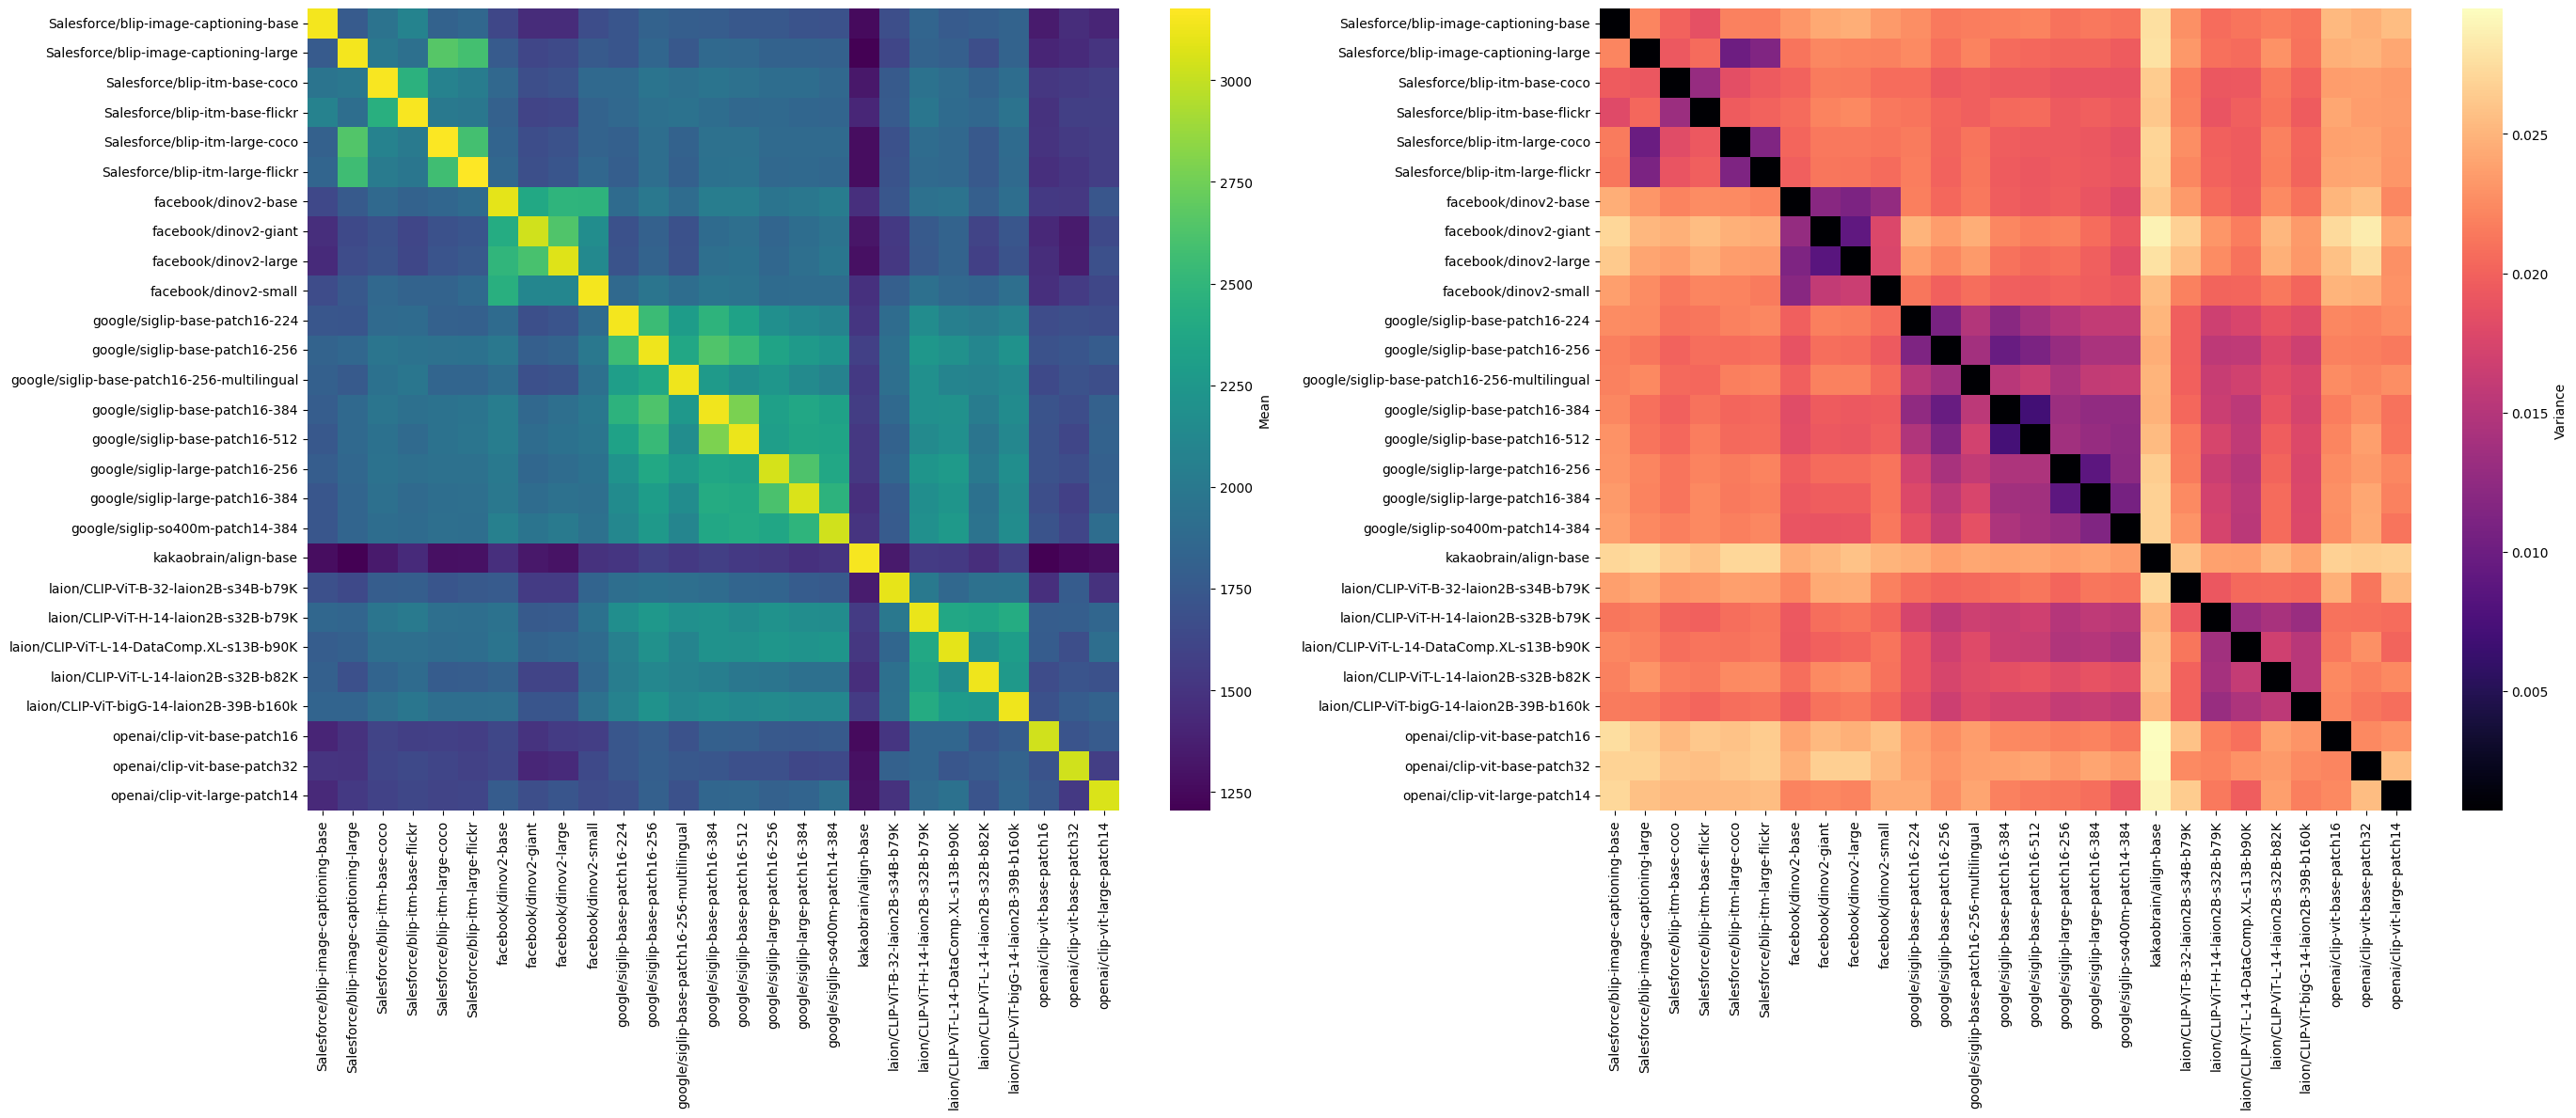

In [5]:
# Reorder rows/cols alphabetically by names
sorted_names = sorted(names)
# Get indices to reorder
sorted_indices = [names.index(n) for n in sorted_names]
# Reorder expectations and variances
expectations_sorted = expectations[np.ix_(sorted_indices, sorted_indices)]
variances_sorted = variances[np.ix_(sorted_indices, sorted_indices)]

plt.figure(figsize=(28, 12))

# Expectation heatmap
plt.subplot(1, 2, 1)
sns.heatmap(expectations_sorted,
            xticklabels=sorted_names,
            yticklabels=sorted_names,
            cmap='viridis',
            cbar_kws={'label': 'Mean'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Variance heatmap
plt.subplot(1, 2, 2)
sns.heatmap(variances_sorted,
            xticklabels=sorted_names,
            yticklabels=sorted_names,
            cmap='magma',
            cbar_kws={'label': 'Variance'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()

plt.savefig("kernel_comparision_heatmaps.pdf", dpi=300, bbox_inches='tight')
plt.show()

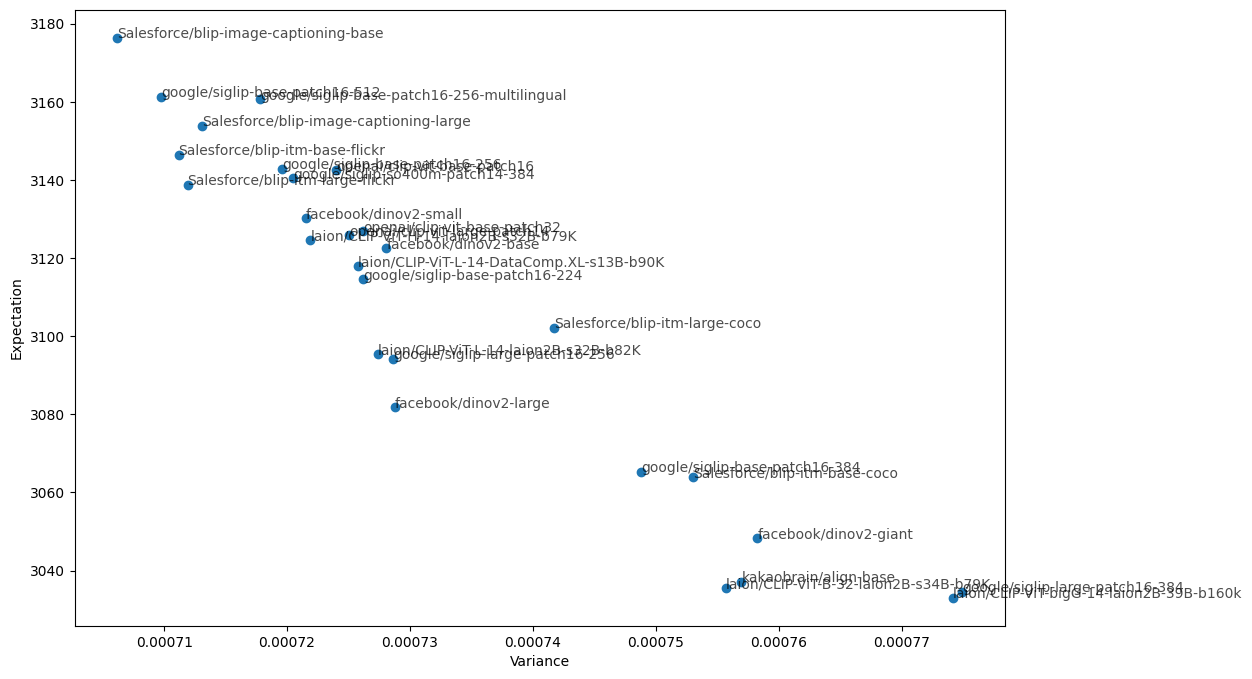

In [8]:
exp_d = np.diag(expectations)
var_d = np.diag(variances)
plt.figure(figsize=(12, 8))
plt.scatter(var_d, exp_d)
plt.xlabel('Variance')
plt.ylabel('Expectation')

for i in range(len(var_d)):
    plt.annotate(sorted_names[i], (var_d[i], exp_d[i]), fontsize=10, alpha=0.7)

plt.show()

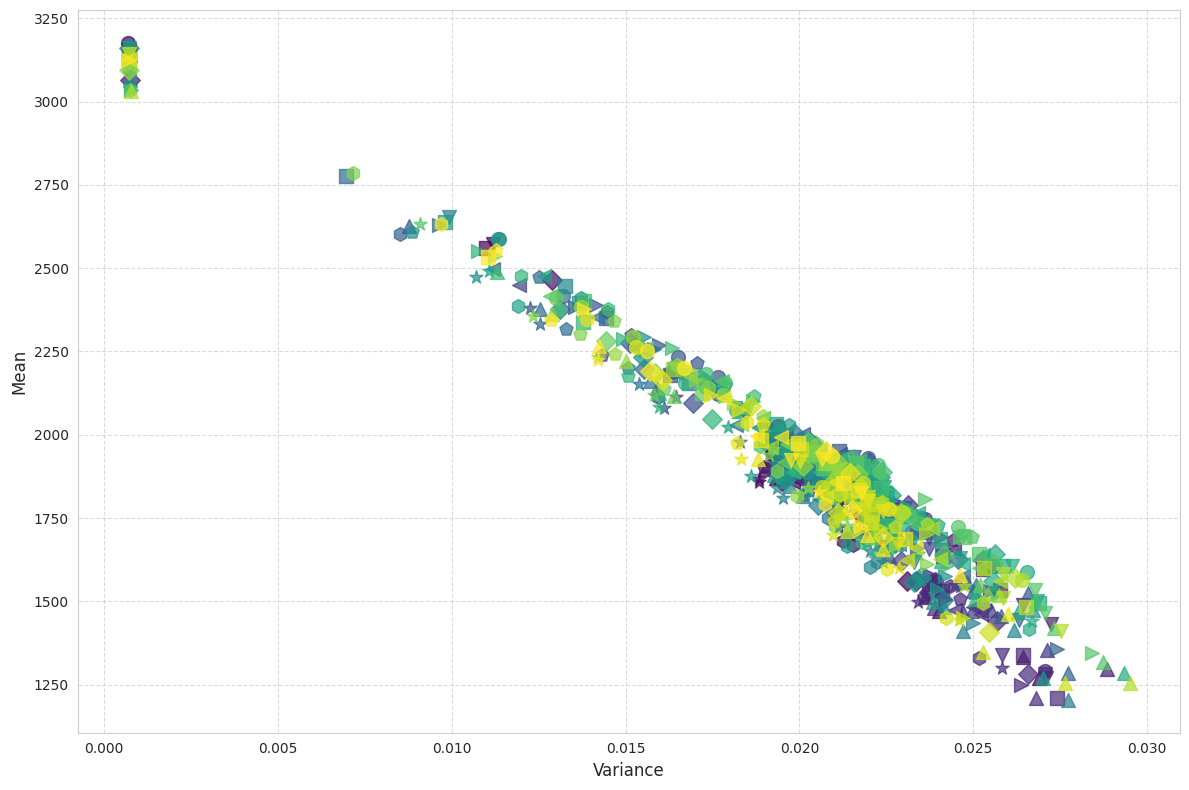

In [19]:
plt.figure(figsize=(12, 8))

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
colors = plt.cm.viridis(np.linspace(0, 1, len(kernels)))

plotted_K = set()
plotted_M = set()

for K_idx in range(len(kernels)):
    for M_idx in range(len(kernels)):
        y_val = expectations[K_idx, M_idx]
        x_val = variances[K_idx, M_idx]
        
        k_label = f"K: {names[K_idx]}" if names[K_idx] not in plotted_K else None
        if k_label:
            plotted_K.add(names[K_idx])
        
        plt.scatter(x_val, y_val, 
                    s=100,
                    color=colors[K_idx],
                    marker=markers[M_idx % len(markers)],
                    alpha=0.7,
                    label=k_label)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=markers[i % len(markers)], color='gray', 
                         label=f"M: {names[i]}", markersize=10, linestyle='None')
                  for i in range(len(names))]

#first_legend = plt.legend(title="Kernel K (color)", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.gca().add_artist(first_legend)

#plt.legend(handles=legend_elements, title="Kernel M (marker)", 
#           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.ylabel('Mean', fontsize=12)
plt.xlabel('Variance', fontsize=12)
#plt.title('Relationship Between Variance and Expectation\nfor Different Kernel Combinations', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

#save to pdf
plt.savefig("kernel_expectation_variance_comparision2.pdf", dpi=300, bbox_inches='tight')

plt.show()


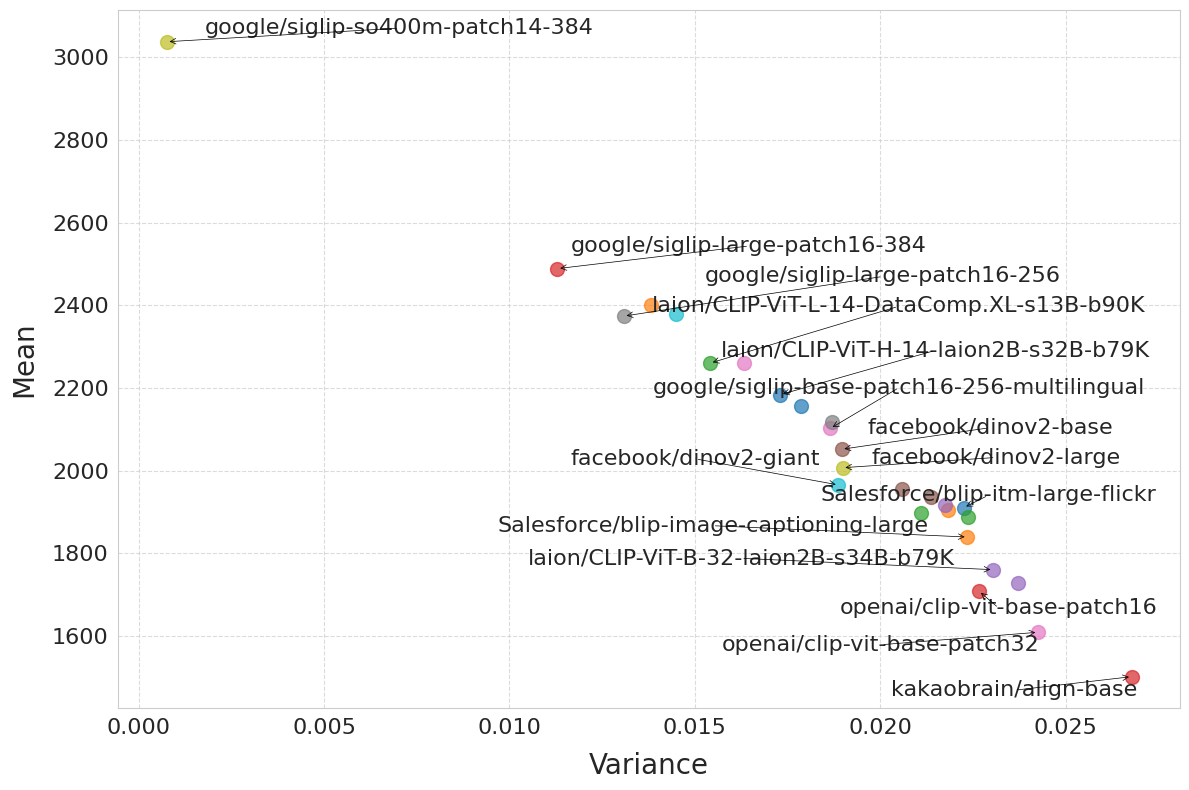

google/siglip-so400m-patch14-384


In [20]:
plt.figure(figsize=(12,8))

markers = ['o']
colors = plt.cm.viridis(np.linspace(0, 1, len(kernels)))

plotted_K = set()
plotted_M = set()

from adjustText import adjust_text
texts = []

K_idx = 18

# Control whether to drop dense labels or not
drop_dense_labels = True  # Set to False to show all labels

label_min_dist = 40  # tweak as needed
labeled_points = []

for M_idx in range(len(kernels)):
    y_val = expectations[K_idx, M_idx]
    x_val = variances[K_idx, M_idx]
    
    m_label = f"M: {names[M_idx]}" if names[M_idx] not in plotted_M else None
    if m_label:
        plotted_M.add(names[M_idx])
    
    plt.scatter(x_val, y_val, 
                s=100,
                marker=markers[K_idx % len(markers)],
                alpha=0.7,
                label=m_label)
    
    add_label = True
    if drop_dense_labels:
        # Only add a label if not too close to an already-labeled point
        for px, py in labeled_points:
            if np.hypot(x_val - px, y_val - py) < label_min_dist:
                add_label = False
                break
    # If not dropping dense labels, always add
    if add_label:
        model_name = names[M_idx].replace('K_', '').replace('_8192', '')
        texts.append(plt.text(x_val, y_val, model_name, fontsize=16))
        if drop_dense_labels:
            labeled_points.append((x_val, y_val))
    # else: skip label for this point

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=markers[K_idx % len(markers)], color='gray', 
                         label=f"K: {names[K_idx]}", markersize=14, linestyle='None')]  # Increased markersize

#first_legend = plt.legend(title="Kernel M (color)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18)  # Increased fontsize
#plt.gca().add_artist(first_legend)

plt.ylabel('Mean', fontsize=20, labelpad=10)
plt.xlabel('Variance', fontsize=20, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

#plt.yscale('log')
#plt.xscale('log')

if texts:
    adjust_text(texts, 
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
                expand_points=(3.0, 3.0),
                force_points=(1.0, 1.0),
                force_text=(1.0, 1.0),
                only_move={'points':'xy', 'text':'xy'},
                fontsize=16)  # Increased fontsize for adjust_text
plt.savefig('kernel_variance_expectation_dropped.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
print(names[K_idx])


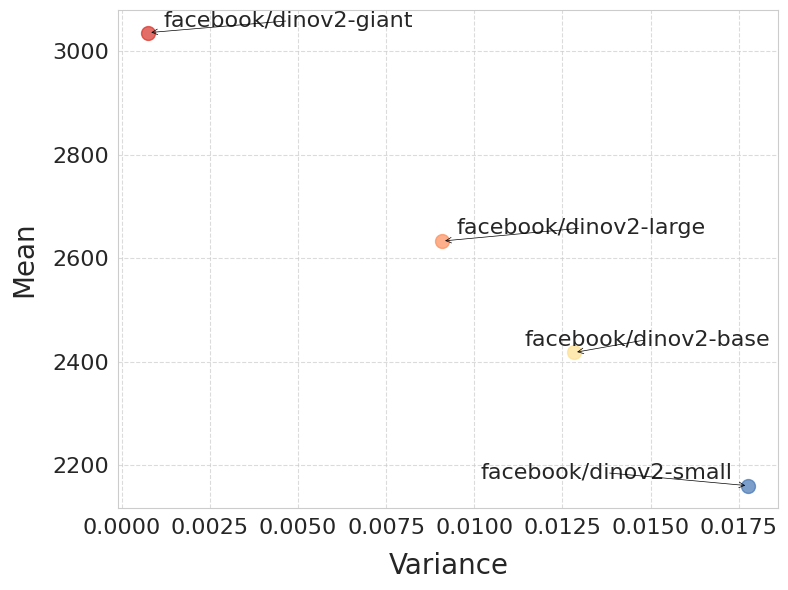

Plotted facebook models for K_idx: facebook/dinov2-giant


In [21]:
plt.figure(figsize=(8,6))
size_to_color = {
    'giant': '#d73027',   # red
    'large': '#fc8d59',   # orange
    'base':  '#fee090',   # yellow
    'small': '#4575b4',   # blue
}
markers = ['o']

plotted_K = set()
plotted_M = set()

texts = []

K_idx = 19

# Control whether to drop dense labels or not
drop_dense_labels = True  # Set to False to show all labels

label_min_dist = 0.01  # in log-log space, tweak as needed
labeled_points = []

# Only plot facebook models
facebook_indices = [i for i, n in enumerate(names) if "facebook" in n.lower()]

def get_size_from_name(name):
    # Try to infer size from model name
    for size in size_to_color:
        if size in name.lower():
            return size
    return 'base'  # default if not found

for M_idx in facebook_indices:
    y_val = expectations[K_idx, M_idx]
    x_val = variances[K_idx, M_idx]
    
    m_label = f"M: {names[M_idx]}" if names[M_idx] not in plotted_M else None
    if m_label:
        plotted_M.add(names[M_idx])
    
    # Determine color by model size
    model_size = get_size_from_name(names[M_idx])
    color = size_to_color.get(model_size, '#fee090')  # default to 'base' color if not found
    
    plt.scatter(x_val, y_val, 
                s=100,
                marker=markers[K_idx % len(markers)],
                alpha=0.7,
                color=color,
                label=m_label)
    
    model_name = names[M_idx].replace('K_', '').replace('_8192', '')
    texts.append(plt.text(x_val, y_val, model_name, fontsize=16))
    if drop_dense_labels:
        labeled_points.append((np.log10(x_val), np.log10(y_val)))

from matplotlib.lines import Line2D
# Create legend for sizes/colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='giant', markerfacecolor=size_to_color['giant'], markersize=14),
    Line2D([0], [0], marker='o', color='w', label='large', markerfacecolor=size_to_color['large'], markersize=14),
    Line2D([0], [0], marker='o', color='w', label='base', markerfacecolor=size_to_color['base'], markersize=14),
    Line2D([0], [0], marker='o', color='w', label='small', markerfacecolor=size_to_color['small'], markersize=14),
    Line2D([0], [0], marker=markers[K_idx % len(markers)], color='gray', 
           label=f"K: {names[K_idx]}", markersize=14, linestyle='None')
]

#plt.legend(handles=legend_elements, title="Model Size", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

plt.ylabel('Mean', fontsize=20, labelpad=10)
plt.xlabel('Variance', fontsize=20, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

#plt.yscale('log')
#plt.xscale('log')

if texts:
    adjust_text(texts, 
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
                expand_points=(3.0, 3.0),
                force_points=(1.0, 1.0),
                force_text=(1.0, 1.0),
                only_move={'points':'xy', 'text':'xy'},
                fontsize=16)  # Increased fontsize for adjust_text
plt.savefig('kernel_variance_expectation_dropped_facebook.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
print("Plotted facebook models for K_idx:", names[K_idx])


# Compare the Two

(idx=18, google/siglip-so400m-patch14-384)


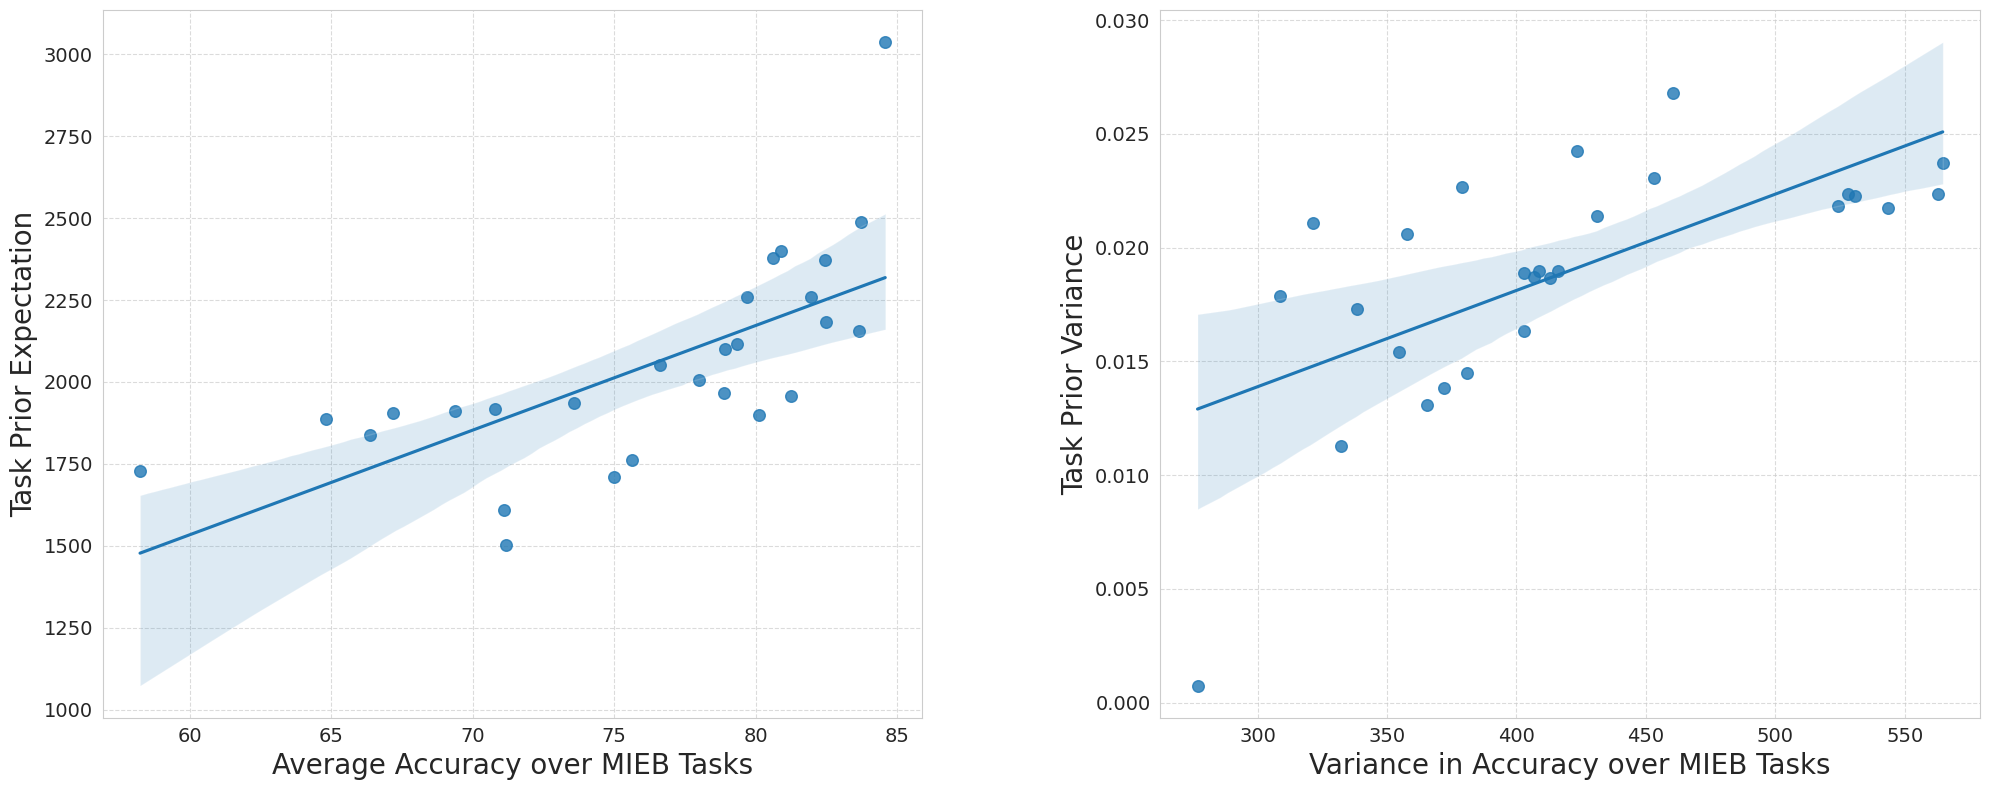

In [37]:
idx = 18
sns.set_style("whitegrid")

ker_mean = expectations[idx]
ker_var = variances[idx]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
print(f"(idx={idx}, {names[idx]})")
# Plot expectations vs loaded averages
sns.regplot(x=emp_means, y=ker_mean, ax=axes[0], scatter_kws={'s': 70})
axes[0].set_xlabel('Average Accuracy over MIEB Tasks', fontsize=20)
axes[0].set_ylabel('Task Prior Expectation', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot variances vs loaded variances
sns.regplot(x=emp_vars, y=ker_var, ax=axes[1], scatter_kws={'s': 70})
axes[1].set_xlabel('Variance in Accuracy over MIEB Tasks', fontsize=20)
axes[1].set_ylabel('Task Prior Variance', fontsize=20)

axes[1].tick_params(axis='both', which='major', labelsize=14)

axes[0].grid(True, linestyle='--', alpha=0.7)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(w_pad=10.0)  # Add horizontal spacing between the two images
plt.savefig("kernel_comparision_scatterplots.pdf", dpi=300, bbox_inches='tight')
plt.show()